# 2b: Extended overshoot and stabilisation scenarios for for 10000 years

- Assesses the influence of the temporal irreversibility -> using regional projections with random climate after the year 2500
- creates `Extended Data Fig. 2` and additional regional analysis and figures not shown in the manuscript
- also looks into single glacier behavior in RGI19


In [2]:
# updated script version for flattening gfdl-esm2m overshoot stabilisation scenarios from university of Bern 
from oggm import utils
import json
import oggm
import sys
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
# get the correct colors for the different scenarios
from analysis_func import color_scenario, label_scenario, d_reg_num_name, color_scenario_poster

palette = sns.color_palette(color_scenario.values())
scenarios = color_scenario.keys()

In [3]:
plt.rcParams["pdf.use14corefonts"] = False  # don't convert text to path
plt.rcParams['pdf.fonttype']=42 # do nout line text?

In [4]:
bc = 'bc_1980_2019' # 'bc_2000_2019' #x #
var = 'temp_21yr_avg'

pd_clim_all = pd.read_csv('../data/annual_glob_rgi_reg_basin_temp_precip_timeseries_oversh_stab.csv', index_col = 'Unnamed: 0')

color_scenario_r = {}
color_scenario_r['stab_T15_extended_w_2399-2499_stab_T15'] = color_scenario['stab_T15']
color_scenario_r['oversh_T30OS15_extended_w_2399-2499_stab_T15'] = color_scenario['oversh_T30OS15']
# color_scenario_r['initial state: zero after 500 years'] = 'black'

palette = sns.color_palette(color_scenario_r.values())

df_scenario_extended = xr.open_dataset('../data/common_running_sum_all_rgi_reg_extended_oversh_stab_over_10000years_1980_2019.nc')

In [5]:
roll_avg = 1

pd_vol_scenario_rel_all = (100*df_scenario_extended.volume/(df_scenario_extended.sel(scenario='stab_T15_extended_w_2399-2499_stab_T15').sel(time=2020).squeeze()).volume).rolling(time=roll_avg,center=True).mean().dropna(dim='time',how='all').to_dataframe('volume_rel_2020_%').reset_index()
pd_vol_scenario_rel_glob_all = (100*df_scenario_extended.sum(dim='rgi_reg').squeeze().volume/df_scenario_extended.sum(dim='rgi_reg').volume.sel(scenario='stab_T15_extended_w_2399-2499_stab_T15').sel(time=2020).squeeze()).rolling(time=roll_avg, center=True).mean().dropna(dim='time',how='all').to_dataframe('volume_rel_2020_%').reset_index()
pd_vol_scenario_rel_glob_all.index = pd_vol_scenario_rel_glob_all.time
pd_vol_scenario_rel_all.index = pd_vol_scenario_rel_all.time

**Check how much % glacier loss occurs beyond 2500 for the stab 15 scenario**

In [6]:
_sel_2500 = pd_vol_scenario_rel_glob_all.loc[2500]
_sel_final = pd_vol_scenario_rel_glob_all.loc[10000]
_sel_2500.loc[_sel_2500.scenario=='stab_T15_extended_w_2399-2499_stab_T15','volume_rel_2020_%'].values- _sel_final.loc[_sel_final.scenario=='stab_T15_extended_w_2399-2499_stab_T15','volume_rel_2020_%'].values

array([6.0044975, 6.0044975], dtype=float32)

2252.0 16.057640075683594


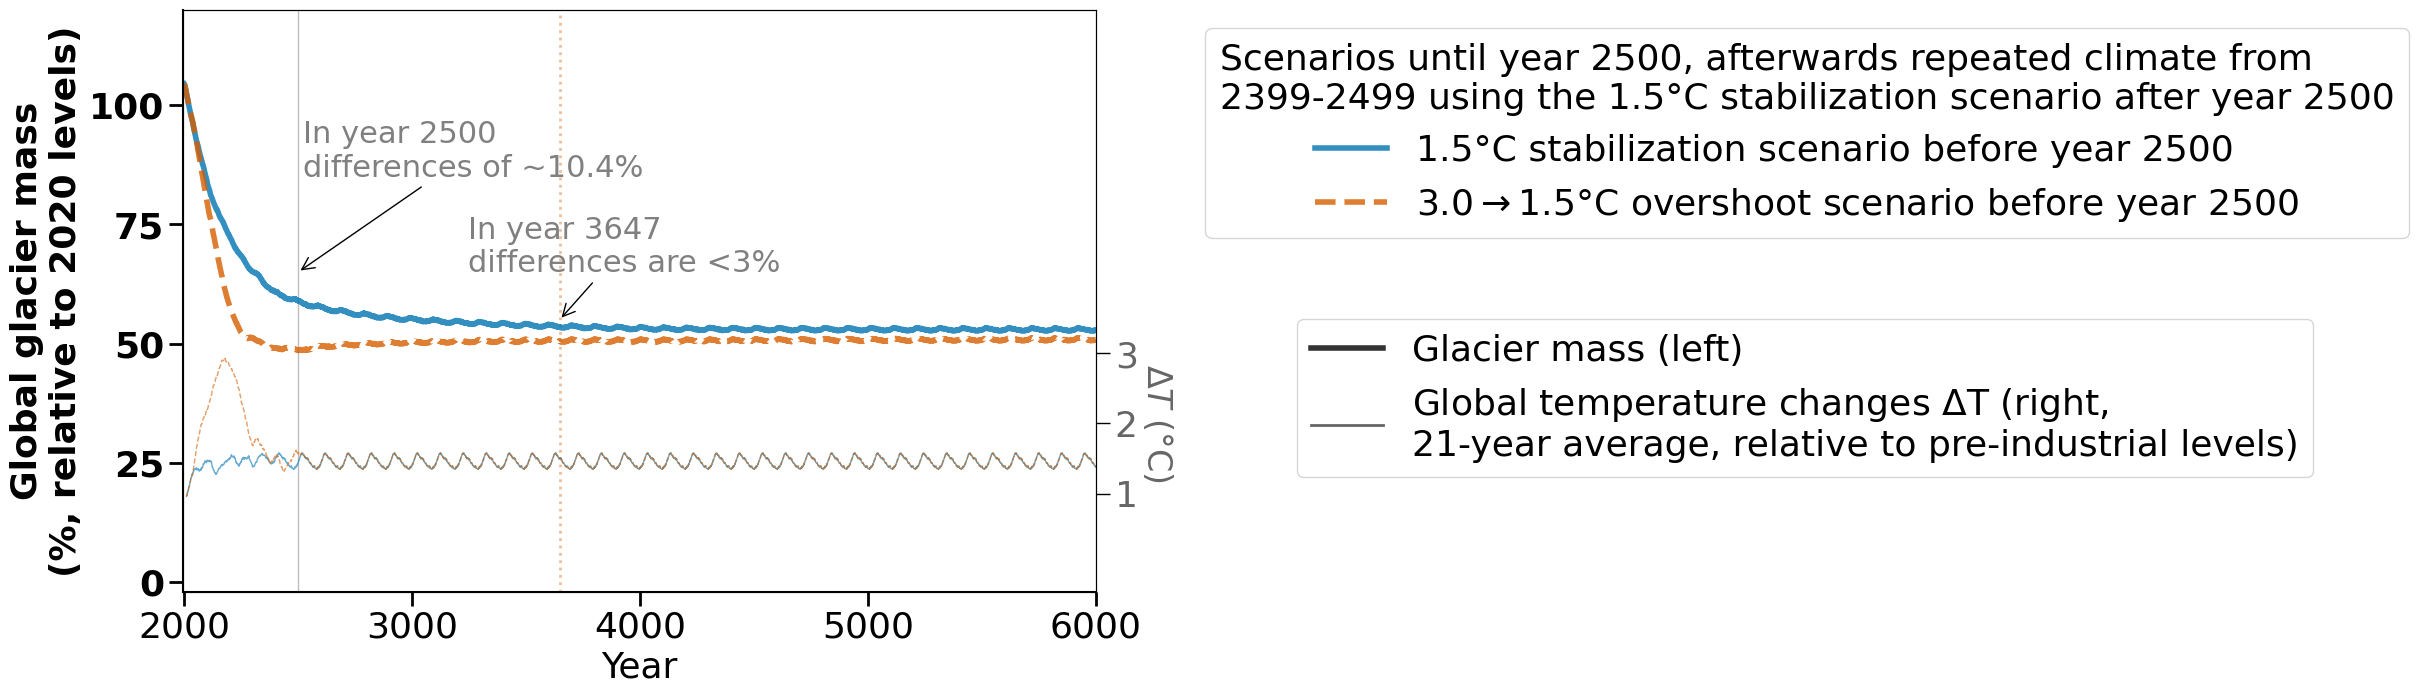

In [19]:
show_temp = True
if not show_temp:
    add = '_no_temp'
else:
    add = ''
    
if show_temp:
    alpha_temp = 1
    alpha_temp2 = 0.6
    width=1
    length=10
else:
    alpha_temp = 0
    alpha_temp2 = 0
    width=0
    length=10
    
show_global_temp = True
if show_global_temp:
    add = '_global_temp'


plt.rc('font', size=26)
portrait = True

plot_vlines = True
scenarios_d = {'stab_T15_extended_w_2399-2499_stab_T15': 'stab_T15',
               'oversh_T30OS15_extended_w_2399-2499_stab_T15': 'oversh_T30OS15'}

for a,color_scenarios in zip(['_all'],
                       [color_scenario_r]):
    #scenarios = color_scenarios.keys()
    scenarios = [ 'stab_T15_extended_w_2399-2499_stab_T15', 'oversh_T30OS15_extended_w_2399-2499_stab_T15']
    paletti = list(color_scenarios.values()) #[:-1]  
    if portrait:
        plt.figure(figsize=(42,28)) #, sharey=True, sharex=True)
        plt.subplot(4,4,1)
    else:
        plt.figure(figsize=(45,16)) #, sharey=True, sharex=True)
        plt.subplot(2,7,1)
    ax = plt.gca()
    #ax.set_title('Globally')

    ax.set_ylabel('Global glacier mass\n(%, relative to 2020 levels)', weight='bold')
    sns.lineplot(data=pd_vol_scenario_rel_glob_all.loc[(pd_vol_scenario_rel_glob_all.bias_correction=='bc_1980_2019')&
                                                       (pd_vol_scenario_rel_glob_all.scenario== 'stab_T15_extended_w_2399-2499_stab_T15')],
                 x='time', y= 'volume_rel_2020_%', 
                 color=paletti[0],
                 label='stab',
                 ls='-',
                 #palette=paletti,
                 #hue_order=scenarios,
                 lw=4, legend=True, alpha=0.8,
                 ax = ax)
    sns.lineplot(data=pd_vol_scenario_rel_glob_all.loc[(pd_vol_scenario_rel_glob_all.bias_correction=='bc_1980_2019')&
                                                      (pd_vol_scenario_rel_glob_all.scenario=='oversh_T30OS15_extended_w_2399-2499_stab_T15')],
                 x='time', y= 'volume_rel_2020_%', 
                 color=paletti[1],
                 label='oversh',
                 ls='--',
                 #palette=paletti,
                 #hue_order=scenarios,
                 lw=4, legend=True, alpha=0.8,
                 ax = ax)
    #ax.set_xlabel('Year')
    #ax.grid(axis='x')
    ax.set_ylim([-2,120]);
    ax.set_yticks(ticks=[0,25,50,75,100],
                       labels=[0,25,50,75,100], weight='bold')

    for axis in 'left', 'bottom':
        ax.spines[axis].set_linewidth(1.5)

    # set the parameters for both axis: label size in font points, the line tick line 
    # width and length in pixels
    ax.tick_params(axis='both', which='major', width=2, length=10)
    
    ax.set_xlabel('')
    #ax.set_xlim([2000,2500])
    #ax2.set_xlim([2000,2500])
    plt.axvline(2500, color='grey', zorder=-1, lw=1, alpha = 0.5)
    if plot_vlines:
        for scenario in ['oversh_T30OS15_extended_w_2399-2499_stab_T15']:
            _p_sel = pd_vol_scenario_rel_glob_all#.loc[pd_vol_scenario_rel_glob_all.provide_region == Preg]
            _p_sel.index = _p_sel.time
            _p_sel = _p_sel.loc[_p_sel.scenario == 'stab_T15_extended_w_2399-2499_stab_T15']['volume_rel_2020_%'] - _p_sel.loc[_p_sel.scenario == 'oversh_T30OS15_extended_w_2399-2499_stab_T15']['volume_rel_2020_%']
            print(_p_sel.idxmax(), _p_sel.max())
            _p_sel = _p_sel.loc[2499:]
            yr = _p_sel.loc[_p_sel<3].index.min()
            
            plt.axvline(yr,ls=':', alpha = 0.4, lw=2, 
                       color=color_scenario_r[scenario], zorder=-1)
            if 'oversh' in scenario:
                plt.annotate(xy=(yr, 55),
                             xytext=(yr-400,65), text=f'In year {int(yr)}\ndifferences are <3%',
                             color='grey',arrowprops={'arrowstyle':'->'}, fontsize=22)
                _diff = _p_sel.loc[2499].round(1) # use 2499
                plt.annotate(xy=(2500, 65),
                             xytext=(2500+20,85), text=f'In year 2500\ndifferences of ~{_diff:0.1f}%',
                             color='grey',arrowprops={'arrowstyle':'->'}, fontsize=22)
    ax.set_xlabel('Year')

    ax2 = ax.twinx()  
    for scenario in scenarios:
        
        if show_global_temp:
            pd_clim_scenario = pd_clim_all.loc[pd_clim_all.scenario==scenarios_d[scenario]]
            pd_clim_scenario_g = pd_clim_scenario.loc[pd_clim_scenario.region == 'global']
            pd_clim_scenario_g.index = pd_clim_scenario_g.year
            _p_sel2 = pd_clim_all.loc[pd_clim_all.region=='global']
            _p_sel2 = _p_sel2.loc[_p_sel2.scenario == 'stab_T15']
            _p_sel2.index = _p_sel2.year
            _p_sel = _p_sel2.loc[2399:2500]['temp']
            _temp_vals = np.tile(_p_sel.values, 50)
            pd_temp_vals = pd.DataFrame(index=np.arange(2000,len(_temp_vals)+2500,1))
            pd_temp_vals.loc[2500:, 'temp'] = _temp_vals
            pd_temp_vals.loc[2000:2499, 'temp'] = pd_clim_scenario_g.loc[2000:2499]['temp'].values
            pd_temp_vals = pd_temp_vals.rolling(21, center=True, min_periods=21).mean()
            pd_clim_scenario_g_ref = pd_clim_scenario_g.loc[1986:2005]['temp'].mean()

            var_g_to_ref = pd_temp_vals['temp']- pd_clim_scenario_g_ref + 0.63
            if 'oversh' in scenario:
                ls = '--'
            else:
                ls = '-'
            ax2.plot(pd_temp_vals.index,#pd_clim_scenario_g.year,
                var_g_to_ref, alpha = alpha_temp2, 
                ls = ls,
                 lw=1, color = color_scenario[scenarios_d[scenario]], label=label_scenario[scenarios_d[scenario]])
        else:
            pd_clim_scenario = pd_clim_all.loc[pd_clim_all.scenario==scenarios_d[scenario]]
            pd_clim_scenario_g = pd_clim_scenario.loc[pd_clim_scenario.region == 'global_glacier']
            pd_clim_scenario_g.index = pd_clim_scenario_g.year
            temp_ref_g, precip_ref_g = pd_clim_scenario_g.loc[2000:2019][['temp','precip']].mean()
            var_g_to_ref = pd_clim_scenario_g[var] - temp_ref_g

            _p_sel2 = pd_clim_all.loc[pd_clim_all.region=='global_glacier']
            _p_sel2 = _p_sel2.loc[_p_sel2.scenario == 'stab_T15_extended_w_2399-2499_stab_T15']
            _p_sel2.index = _p_sel2.year
            _p_sel = _p_sel2.loc[2399:2500]['temp']
            _temp_vals = np.tile(_p_sel.values, 50)
            pd_temp_vals = pd.DataFrame(index=np.arange(2000,len(_temp_vals)+2500,1))
            pd_temp_vals.loc[2500:, 'temp'] = _temp_vals
            pd_temp_vals.loc[2000:2499, 'temp'] = pd_clim_scenario_g.loc[2000:2499]['temp'].values
            pd_temp_vals = pd_temp_vals.rolling(21, center=True, min_periods=21).mean()

            var_g_to_ref =pd_temp_vals['temp'] - temp_ref_g
            ax2.plot(pd_temp_vals.index,
                     var_g_to_ref,
                     alpha = alpha_temp2, 
                     ls = '-',
                     lw=1, color = color_scenario[scenarios_d[scenario]], label=label_scenario[scenarios_d[scenario]])
    if show_global_temp:
        ax2.set_yticks(ticks=[1,2,3],
                       labels=[1,2,3], alpha=alpha_temp2)
        ax2.set_ylim([-0.4,7.9]);
    else:
        ax2.set_yticks(ticks=[0,1,2,3,4,5],
                       labels=[0,1,2,3,4,5], alpha=alpha_temp2)
        ax2.set_ylim([-0.4,7.9]);

    #plt.setp(ax2.get_yticklabels(), visible=False, fontsize=1)
    #ax2.set_xlim([2000,2500])
    ax2.tick_params(axis='both', which='major', width=width, length=length, grid_alpha =alpha_temp2)
    handles_2, labels_2_nice = ax2.get_legend_handles_labels()
    
    if show_global_temp:
        ax2.set_ylabel(
                r'$\Delta T$ (°C)', 
                alpha=alpha_temp2,
                fontsize=24,
                rotation=270,
                labelpad=10  # smaller labelpad, just to keep spacing tidy
            )
            
        ax2.yaxis.set_label_coords(1.085, 0.29) 
    else:
        ax2.set_ylabel(r'$\Delta$T'+'(°C) relative to 2000-2019 levels\n(glacier-area weighted)',
                                  alpha = alpha_temp2, fontsize=24)
    ax.set_xlim([1995,6000])
    ax2.set_xlim([1995,6000])

    
    han, lab = ax.get_legend_handles_labels()
    lab[0] = '1.5°C stabilization scenario before year 2500'
    lab[1] = r'3.0$\rightarrow$1.5°C overshoot scenario before year 2500'
    #lab[2] = 'initial state with zero volume'
    ax.legend().remove()

    handles_2, labels_2 = ax2.get_legend_handles_labels()


    plt.tight_layout()
    leg = ax.legend(han, lab, loc = 'upper left',
                    bbox_to_anchor=(1.1,1), 
                    title='Scenarios until year 2500, afterwards repeated climate from\n2399-2499 using the 1.5°C stabilization scenario after year 2500')
    for l in leg.get_lines():
        l.set_linewidth(4)
        
        
    if show_temp:
        leg2 = ax.legend([han[0], handles_2[0]], ['Glacier mass (left)',
                                                 r'Global temperature changes $\Delta$T (right,' + '\n21-year average, relative to pre-industrial levels)'],
                         loc='upper left', ncol=1, fontsize=26,
                        bbox_to_anchor=(1.2,0.5))
        leg2.get_lines()[0].set_linewidth(4)
        leg2.get_lines()[1].set_linewidth(2)
        for l in leg2.get_lines():
            l.set_color('black')
        ax.add_artist(leg)
    #plt.tight_layout()
    #if portrait:
    #    plt.savefig(f'4_provide_reg_volume_changes_overshoot{a}_{bc}_portrait_4cols_random_climate_stabilisation.pdf')
    plt.savefig(f'../figures/ED_fig_4_only_global_reversibility_V2_volume_changes_overshoot{a}_{bc}_portrait_4cols_random_climate_stabilisation{add}.png',
                dpi=300)
    plt.savefig(f'../figures/ED_fig_4_only_global_reversibility_V2_volume_changes_overshoot{a}_{bc}_portrait_4cols_random_climate_stabilisation{add}.pdf',
                dpi=300)
    plt.savefig(f'../figures/ED_fig_4_only_global_reversibility_V2_volume_changes_overshoot{a}_{bc}_portrait_4cols_random_climate_stabilisation{add}.jpg',
                dpi=300)

*Conclusion*:  The additional failing glacier area when running over a longer time period comes specifically from regions 07, 08, 09 and 19. This explains that when only looking at the common running glaciers from the long steady-state runs, the discrepancies in the year 2500 are 10.4%, while they are 11.3% when using more common running glaciers (the common running glaciers until 2500)... 

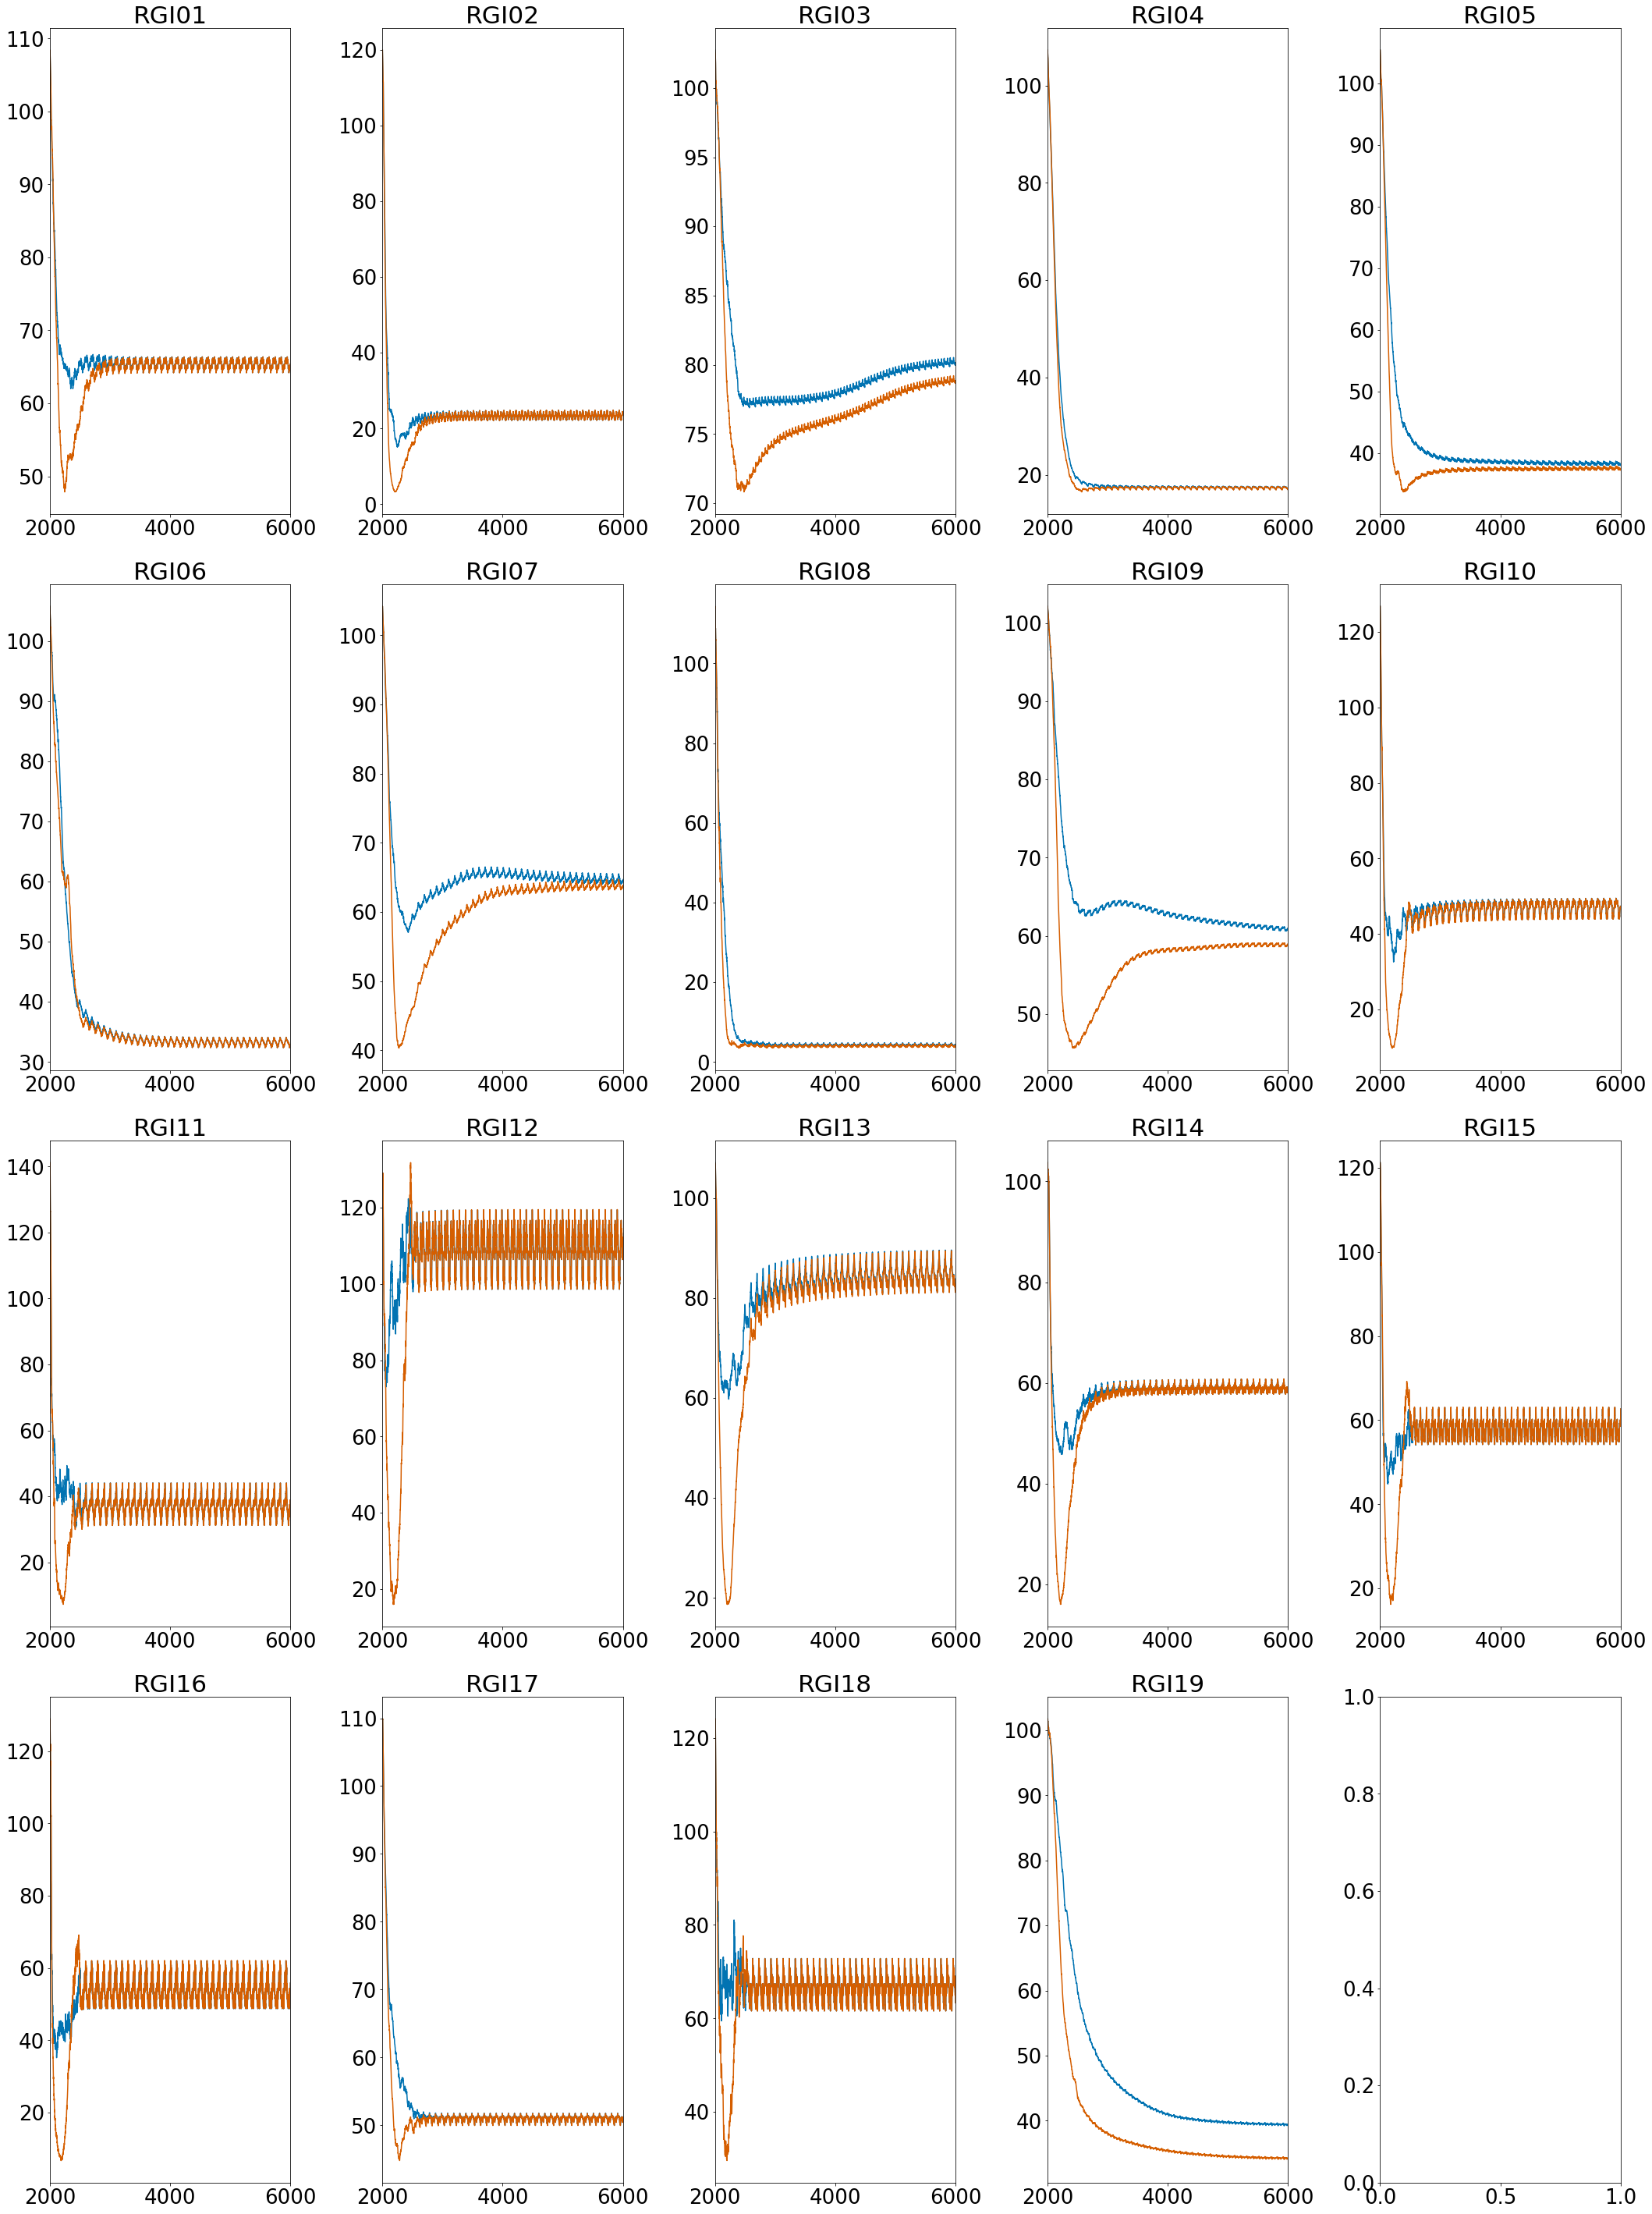

In [68]:
# just a quick check ...
fig, axs = plt.subplots(4,5,figsize=(30,40))
axs = axs.flatten()
for j,rgi_reg in enumerate(df_scenario_extended.rgi_reg.values):
    ax = axs[j]
    ax.set_title('RGI'+rgi_reg)
    for scenario in df_scenario_extended.scenario.values:
        df_scenario_extended_s = df_scenario_extended.sel(scenario=scenario)
        _rel_vol = 100*(df_scenario_extended_s.sel(rgi_reg=rgi_reg).squeeze()/df_scenario_extended_s.sel(rgi_reg=rgi_reg).sel(time=2020).squeeze()).volume
        ax.plot(_rel_vol.to_dataframe().volume, 
                color=color_scenario[scenarios_d[scenario]]);
    ax.set_xlim([2000,6000])
plt.tight_layout()

## Some characteristics, just for fun!

In [35]:
df_scenario_extended_101yr = df_scenario_extended.rolling(time=101, center=True, min_periods=101).mean()
df_scenario_extended_101yr = df_scenario_extended_101yr.dropna(dim='time')

In [36]:
init_vol = (df_scenario_extended.sel(scenario='stab_T15_extended_w_2399-2499_stab_T15').sel(time=2020).squeeze())
ratio_diff = (df_scenario_extended.sum(dim='rgi_reg').volume - df_scenario_extended.sum(dim='rgi_reg').volume.isel(time=-1))/init_vol.sum(dim='rgi_reg')
condi1 = np.abs(ratio_diff)<0.001

df_scenario_not_stabilised_glob = ratio_diff.where(condi1)
pd_scenario_not_stabilised_glob = df_scenario_not_stabilised_glob.to_dataframe().reset_index()
pd_scenario_not_stabilised_glob['rgi_reg'] = 'Global'
pd_scenario_not_stabilised_glob = pd_scenario_not_stabilised_glob[['scenario', 'rgi_reg', 'time', 'volume']]
pd_scenario_not_stabilised_glob.index = pd_scenario_not_stabilised_glob.time
pd_scenario_not_stabilised_glob = pd_scenario_not_stabilised_glob.dropna()

#condi1 = df_scenario.volume/init_vol>=0.999
#condi2 = df_scenario.volume/init_vol<=1.001
ratio_diff = (df_scenario_extended.volume - df_scenario_extended.volume.isel(time=-1))/init_vol
condi1 = np.abs(ratio_diff)<0.001

df_scenario_not_stabilised = ratio_diff.where(condi1)
pd_scenario_not_stabilised = df_scenario_not_stabilised.to_dataframe().reset_index()
pd_scenario_not_stabilised = pd_scenario_not_stabilised.dropna()

pd_scenario_not_stabilised = pd.concat([pd_scenario_not_stabilised_glob, pd_scenario_not_stabilised])
pd_scenario_not_stabilised = pd_scenario_not_stabilised[['scenario', 'rgi_reg', 'time', 'volume']]
pd_scenario_not_stabilised = pd_scenario_not_stabilised.dropna()

pd_scenario_not_stabilised.index = pd_scenario_not_stabilised.time
pd_scenario_stabilised = pd_scenario_not_stabilised.groupby(['scenario', 'rgi_reg']).idxmin()[['time']].reset_index()
pd_scenario_stabilised = pd_scenario_stabilised.pivot(columns='rgi_reg', index='scenario')
pd_scenario_stabilised.columns = pd_scenario_not_stabilised.rgi_reg.unique()

In [37]:
# at what year does it stabilise
pd_scenario_stabilised

,Global,01,02,03,04,05,06,07,08,09,10,11,12,13,14,15,16,17,18,19
scenario,,,,,,,,,,,,,,,,,,,,
oversh_T30OS15_extended_w_2399-2499_stab_T15,2817.0,2089.0,2180.0,2457.0,2218.0,2953.0,2145.0,2268.0,2205.0,3498.0,2476.0,2417.0,5830.0,2065.0,2512.0,2495.0,2181.0,2566.0,6641.0,2268.0
stab_T15_extended_w_2399-2499_stab_T15,2219.0,2133.0,2301.0,2760.0,2845.0,2954.0,2207.0,2550.0,7769.0,3094.0,2132.0,2022.0,2032.0,2081.0,2048.0,2602.0,2520.0,2169.0,7045.0,3652.0


In [39]:
pd_vol_scenario_rel = (100*df_scenario_extended.volume/(df_scenario_extended.sel(scenario='stab_T15_extended_w_2399-2499_stab_T15').sel(time=2020).squeeze())).volume.to_dataframe('volume_rel_2020_%').reset_index()
df_scenario_extended_glob = df_scenario_extended.sum(dim='rgi_reg')
pd_vol_scenario_glob = (100*df_scenario_extended_glob.volume/(df_scenario_extended_glob.sel(scenario='stab_T15_extended_w_2399-2499_stab_T15').volume.sel(time=2020).values)).to_dataframe('volume_rel_2020_%').reset_index()
#pd_vol_scenario_rel['time_true'] = pd_vol_scenario_rel['time'] + 500
#pd_vol_scenario_glob['time_true'] = pd_vol_scenario_glob['time'] + 500

pd_vol_scenario_rel_f = pd_vol_scenario_rel.loc[pd_vol_scenario_rel.time==10000.0]
pd_vol_scenario_rel_f.index = pd_vol_scenario_rel_f.rgi_reg
pd_vol_scenario_glob['rgi_reg'] = 'Global'
pd_vol_scenario_glob_f = pd_vol_scenario_glob.loc[pd_vol_scenario_glob.time==10000.0]
pd_vol_scenario_glob_f.index = pd_vol_scenario_glob_f.rgi_reg
pd_vol_scenario_rel_f = pd.concat([pd_vol_scenario_glob_f, pd_vol_scenario_rel_f])
pd_vol_scenario_f_diff = (pd_vol_scenario_rel_f.loc[pd_vol_scenario_rel_f.scenario=='oversh_T30OS15_extended_w_2399-2499_stab_T15']['volume_rel_2020_%'] 
                        - pd_vol_scenario_rel_f.loc[pd_vol_scenario_rel_f.scenario=='stab_T15_extended_w_2399-2499_stab_T15']['volume_rel_2020_%'])
#pd_vol_scenario_f_diff_zero = pd_vol_scenario_rel_f.loc[pd_vol_scenario_rel_f.scenario=='initial state: zero after 500 years']['volume_rel_2020_%'] - pd_vol_scenario_rel_f.loc[pd_vol_scenario_rel_f.scenario=='initial state: stab_T15 after 500 years']['volume_rel_2020_%']
#pd_stats_stabilisation = pd.DataFrame([pd_vol_scenario_f_diff.round(1), pd_vol_scenario_f_diff_zero.round(1)])
#pd_stats_stabilisation.index = [
#                               'Volume differences between initial states with zero volume and stabilisation +1.5°C scenario (% relative to 2020)']
print('Volume differences between initial states from overshoot +3.0°C->+1.5°C and stabilisation +1.5°C scenario (% relative to 2020)')

pd_vol_scenario_f_diff

Volume differences between initial states from overshoot +3.0°C->+1.5°C and stabilisation +1.5°C scenario (% relative to 2020)


rgi_reg
Global   -1.936874
01       -0.018990
02        0.007345
03       -0.984138
04       -0.039982
05       -0.732021
06       -0.014355
07       -0.721439
08       -0.217318
09       -1.662037
10        0.009838
11       -0.020454
12        0.039345
13       -0.077904
14        0.000755
15        0.032307
16        0.070450
17       -0.031597
18       -0.020554
19       -5.138023
Name: volume_rel_2020_%, dtype: float32

### Year when steady-state is reached:

In [45]:
### sth.is wrong here
load = False
if load: 
    condi1 = df_scenario_extended.sum(dim='rgi_reg').volume/df_scenario_extended.sum(dim='rgi_reg').volume.isel(time=-1)<=0.99
    condi2 = df_scenario_extended.sum(dim='rgi_reg').volume/df_scenario_extended.sum(dim='rgi_reg').volume.isel(time=-1)>=1.01
    df_scenario_not_stabilised_glob = df_scenario_extended.sum(dim='rgi_reg').volume.where(condi1|condi2)
    pd_scenario_not_stabilised_glob = df_scenario_not_stabilised_glob.to_dataframe().reset_index()
    pd_scenario_not_stabilised_glob['rgi_reg'] = 'Global'
    pd_scenario_not_stabilised_glob.index = pd_scenario_not_stabilised_glob.time

    condi1 = df_scenario_extended.volume/df_scenario_extended.volume.isel(time=-1)<=0.99
    condi2 = df_scenario_extended.volume/df_scenario_extended.volume.isel(time=-1)>=1.01
    df_scenario_not_stabilised = df_scenario_extended.volume.where(condi1|condi2)
    pd_scenario_not_stabilised = df_scenario_not_stabilised.to_dataframe().reset_index()
    pd_scenario_not_stabilised.index = pd_scenario_not_stabilised.time
    pd_scenario_not_stabilised = pd.concat([pd_scenario_not_stabilised_glob, pd_scenario_not_stabilised])
    pd_scenario_not_stabilised.groupby(['scenario', 'rgi_reg'])[['volume']].idxmax()

## for every RGI region...  not shown in manuscript

2252.0 16.057640075683594


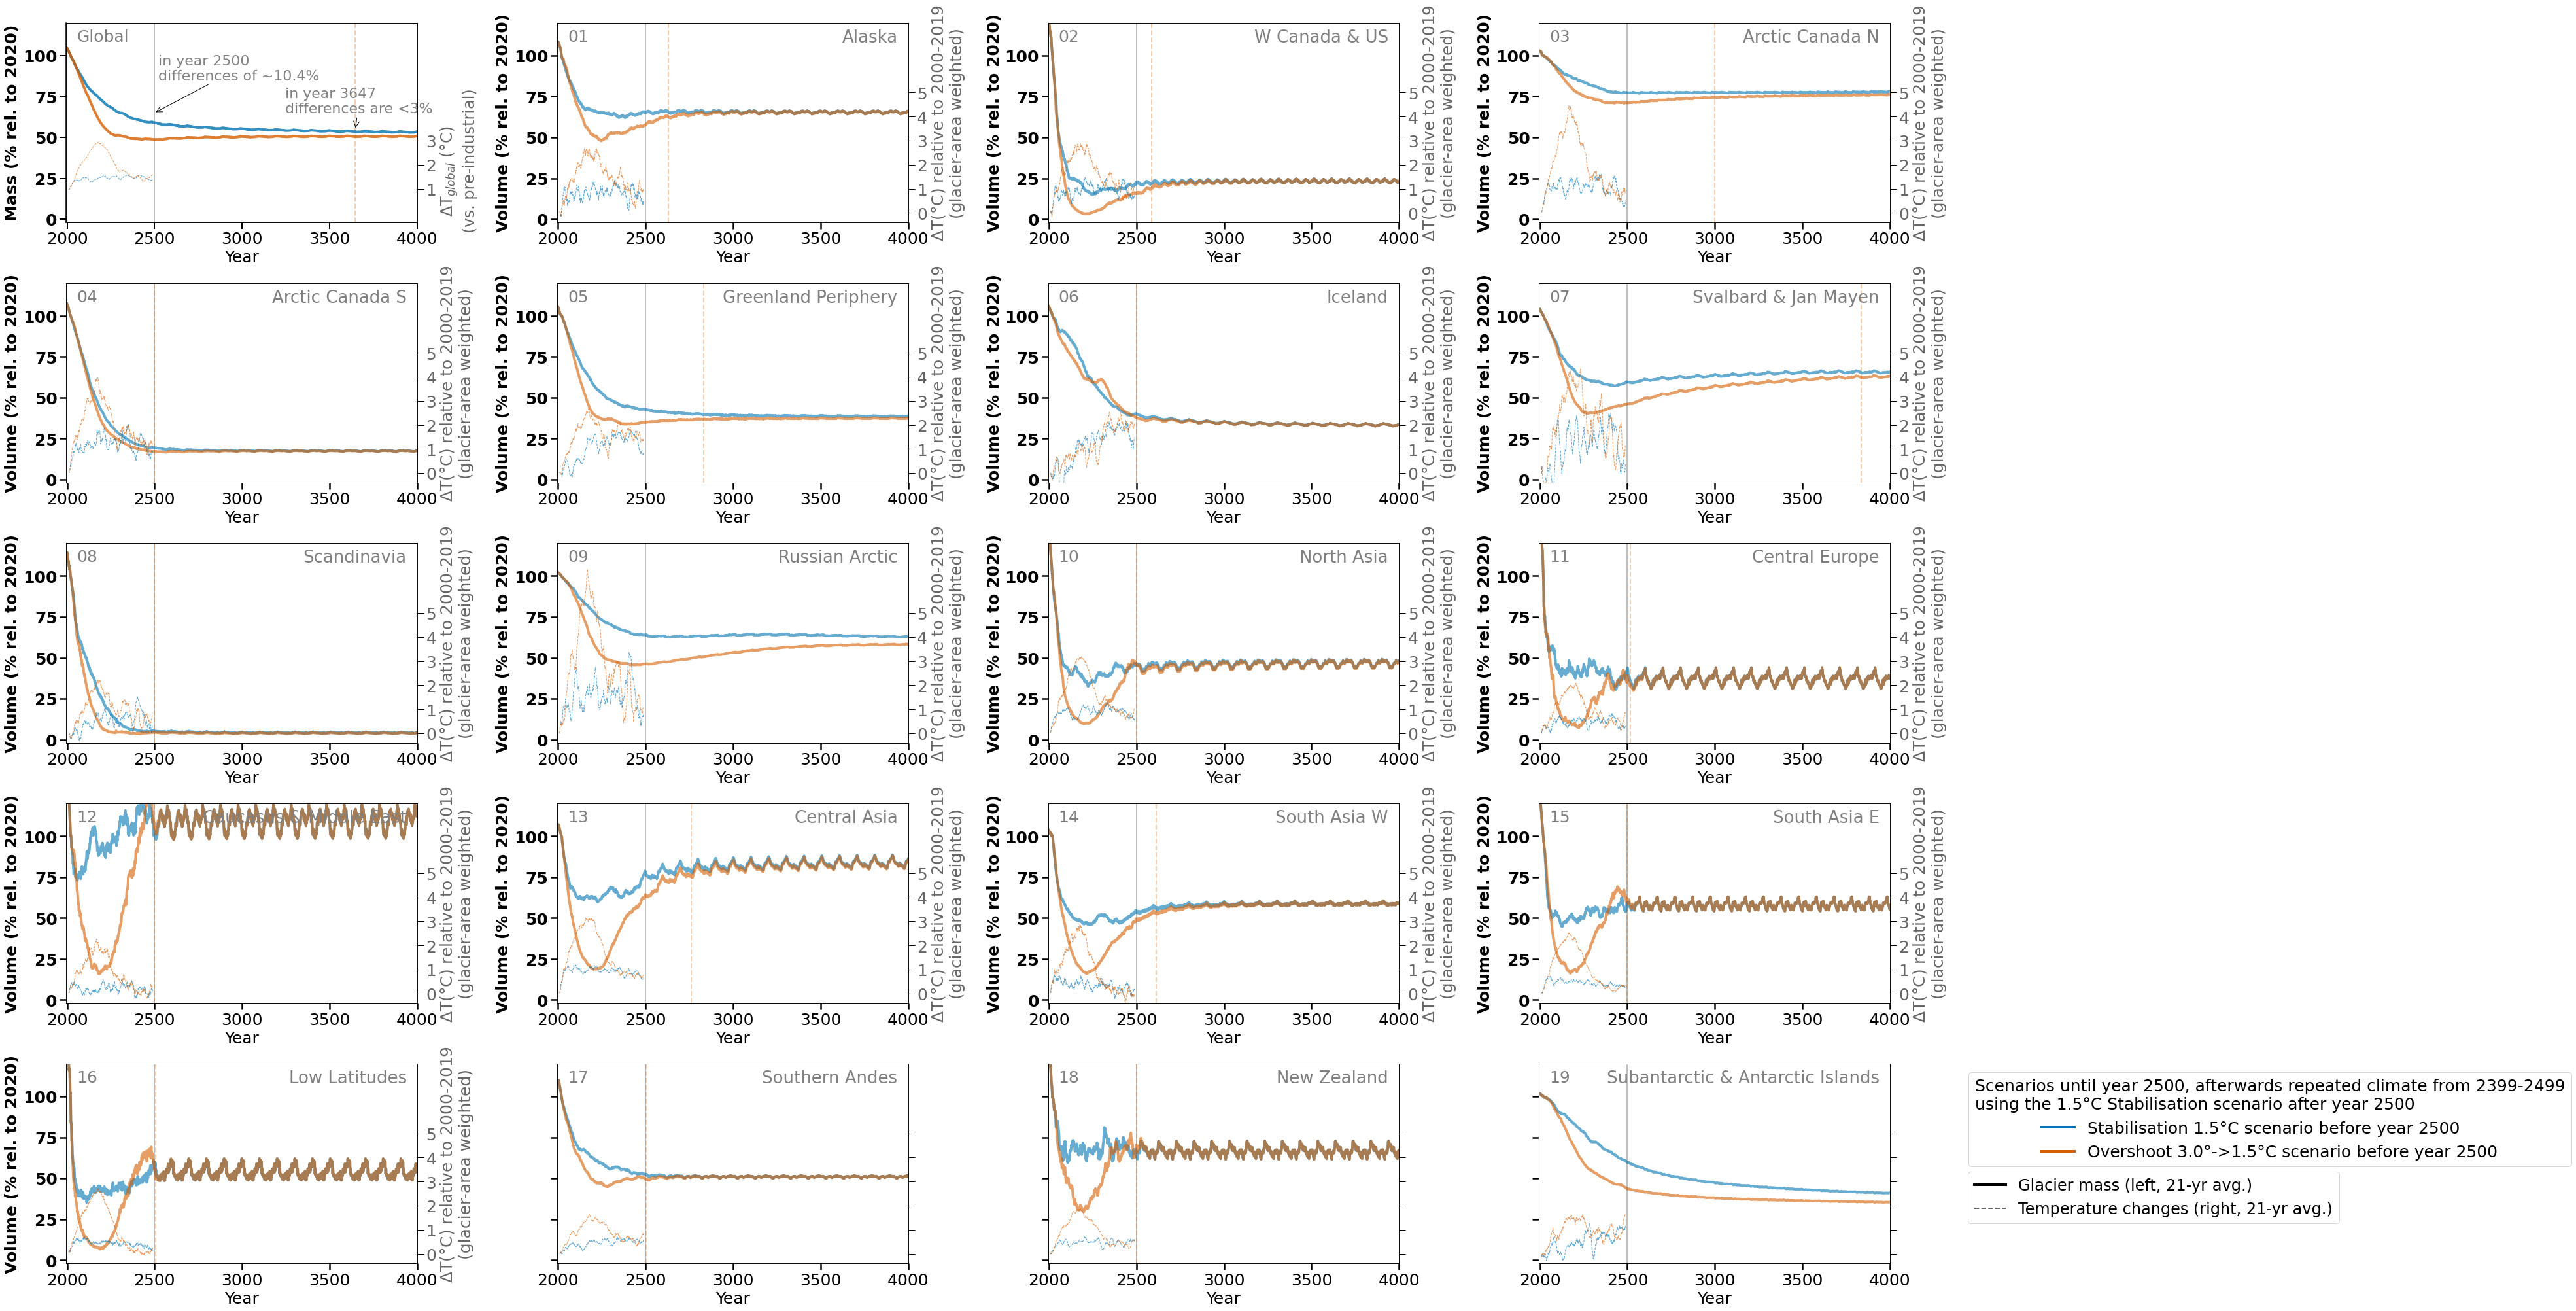

In [69]:
show_temp = True
if not show_temp:
    add = '_no_temp'
else:
    add = ''
    
if show_temp:
    alpha_temp = 1
    alpha_temp2 = 0.6
    width=1
    length=10
else:
    alpha_temp = 0
    alpha_temp2 = 0
    width=0
    length=10
    
show_global_temp = True
if show_global_temp:
    add = '_global_temp'


plt.rc('font', size=25)
portrait = True

plot_vlines = True


for a,color_scenarios in zip(['_all'],
                       [color_scenario_r]):
    #scenarios = color_scenarios.keys()
    # scenarios = [ 'stab_T15', 'oversh_T30OS15']
    scenarios = [ 'stab_T15_extended_w_2399-2499_stab_T15', 'oversh_T30OS15_extended_w_2399-2499_stab_T15']

    paletti = list(color_scenarios.values())
    if portrait:
        plt.figure(figsize=(42,28)) #, sharey=True, sharex=True)
        plt.subplot(5,4,1)
    else:
        plt.figure(figsize=(45,16)) #, sharey=True, sharex=True)
        plt.subplot(2,7,1)
    ax = plt.gca()
    #ax.set_title('Globally')
    plt.text(0.03,0.97, 'Global',
             transform=ax.transAxes,ha='left',va='top',
             color='grey', fontsize=25)
    ax.set_ylabel('Mass (%, relative to 2020 levels)', weight='bold')
    sns.lineplot(data=pd_vol_scenario_rel_glob_all.loc[pd_vol_scenario_rel_glob_all.bias_correction=='bc_1980_2019'],
                 hue='scenario', x='time', y= 'volume_rel_2020_%', 
                 palette=paletti,
                 hue_order=scenarios,lw=4, legend=False, alpha=0.8,
                 ax = ax)
    #ax.set_xlabel('Year')
    #ax.grid(axis='x')
    ax.set_ylim([-2,120]);
    ax.set_yticks(ticks=[0,25,50,75,100],
                       labels=[0,25,50,75,100], weight='bold')

    for axis in 'left', 'bottom':
        ax.spines[axis].set_linewidth(1.5)

    # set the parameters for both axis: label size in font points, the line tick line 
    # width and length in pixels
    ax.tick_params(axis='both', which='major', width=2, length=10)
    
    ax.set_xlabel('')
    #ax.set_xlim([2000,2500])
    #ax2.set_xlim([2000,2500])
    plt.axvline(2500, color='grey', zorder=-1, lw=2, alpha = 0.5)
    if plot_vlines:
        for scenario in ['oversh_T30OS15_extended_w_2399-2499_stab_T15']:
            _p_sel = pd_vol_scenario_rel_glob_all#.loc[pd_vol_scenario_rel_glob_all.provide_region == Preg]
            _p_sel.index = _p_sel.time
            _p_sel = _p_sel.loc[_p_sel.scenario == 'stab_T15_extended_w_2399-2499_stab_T15']['volume_rel_2020_%'] - _p_sel.loc[_p_sel.scenario == 'oversh_T30OS15_extended_w_2399-2499_stab_T15']['volume_rel_2020_%']
            print(_p_sel.idxmax(), _p_sel.max())
            _p_sel = _p_sel.loc[2499:]
            yr = _p_sel.loc[_p_sel<3].index.min()
            
            plt.axvline(yr,ls='--', alpha = 0.3, lw=2, 
                       color=color_scenario_r[scenario], zorder=-1)
            if 'oversh' in scenario:
                plt.annotate(xy=(yr, 55),
                             xytext=(yr-400,65), text=f'In year {int(yr)}\ndifferences are <3%',
                             color='grey',arrowprops={'arrowstyle':'->'}, fontsize=22)
                _diff = _p_sel.loc[2499].round(1) # use 2499
                plt.annotate(xy=(2500, 65),
                             xytext=(2500+20,85), text=f'In year 2500\ndifferences of ~{_diff:0.1f}%',
                             color='grey',arrowprops={'arrowstyle':'->'}, fontsize=22)
    ax.set_xlabel('Year')

    ax2 = ax.twinx()  
    for scenario in scenarios:
        
        if show_global_temp:
            pd_clim_scenario = pd_clim_all.loc[pd_clim_all.scenario==scenarios_d[scenario]]
            pd_clim_scenario_g = pd_clim_scenario.loc[pd_clim_scenario.region == 'global']
            pd_clim_scenario_g.index = pd_clim_scenario_g.year
            _p_sel2 = pd_clim_all.loc[pd_clim_all.region=='global']
            _p_sel2 = _p_sel2.loc[_p_sel2.scenario == 'stab_T15_extended_w_2399-2499_stab_T15']
            _p_sel2.index = _p_sel2.year
            _p_sel = _p_sel2.loc[2399:2500]['temp']
            _temp_vals = np.tile(_p_sel.values, 50)
            pd_temp_vals = pd.DataFrame(index=np.arange(2000,len(_temp_vals)+2500,1))
            pd_temp_vals.loc[2500:, 'temp'] = _temp_vals
            pd_temp_vals.loc[2000:2499, 'temp'] = pd_clim_scenario_g.loc[2000:2499]['temp'].values
            pd_temp_vals = pd_temp_vals.rolling(21, center=True, min_periods=21).mean()
            var_g_to_ref = pd_temp_vals['temp']- pd_clim_scenario_g_ref + 0.63

            ax2.plot(pd_temp_vals.index,#pd_clim_scenario_g.year,
                var_g_to_ref, alpha = alpha_temp2, 
                ls = '--',
                 lw=1, color = color_scenario[scenarios_d[scenario]], label=label_scenario[scenarios_d[scenario]])
        else:
            pd_clim_scenario = pd_clim_all.loc[pd_clim_all.scenario==scenarios_d[scenario]]
            pd_clim_scenario_g = pd_clim_scenario.loc[pd_clim_scenario.region == 'global_glacier']
            pd_clim_scenario_g.index = pd_clim_scenario_g.year
            temp_ref_g, precip_ref_g = pd_clim_scenario_g.loc[2000:2019][['temp','precip']].mean()
            var_g_to_ref = pd_clim_scenario_g[var] - temp_ref_g

            _p_sel2 = pd_clim_all.loc[pd_clim_all.region=='global_glacier']
            _p_sel2 = _p_sel2.loc[_p_sel2.scenario == 'stab_T15_extended_w_2399-2499_stab_T15']
            _p_sel2.index = _p_sel2.year
            _p_sel = _p_sel2.loc[2399:2500]['temp']
            _temp_vals = np.tile(_p_sel.values, 50)
            pd_temp_vals = pd.DataFrame(index=np.arange(2000,len(_temp_vals)+2500,1))
            pd_temp_vals.loc[2500:, 'temp'] = _temp_vals
            pd_temp_vals.loc[2000:2499, 'temp'] = pd_clim_scenario_g.loc[2000:2499]['temp'].values
            pd_temp_vals = pd_temp_vals.rolling(21, center=True, min_periods=21).mean()

            var_g_to_ref =pd_temp_vals['temp'] - temp_ref_g
            ax2.plot(pd_temp_vals.index,
                     var_g_to_ref,
                     alpha = alpha_temp2, 
                     ls = '--',
                     lw=1, color = color_scenario[scenarios_d[scenario]], label=label_scenario[scenarios_d[scenario]])
    if show_global_temp:
        ax2.set_yticks(ticks=[1,2,3],
                       labels=[1,2,3], alpha=alpha_temp2)
        ax2.set_ylim([-0.4,7.9]);
    else:
        ax2.set_yticks(ticks=[0,1,2,3,4,5],
                       labels=[0,1,2,3,4,5], alpha=alpha_temp2)
        ax2.set_ylim([-0.4,7.9]);

    #plt.setp(ax2.get_yticklabels(), visible=False, fontsize=1)
    #ax2.set_xlim([2000,2500])
    ax2.tick_params(axis='both', which='major', width=width, length=length, grid_alpha =alpha_temp2)
    handles_2, labels_2_nice = ax2.get_legend_handles_labels()
    
    if show_global_temp:
        ax2.set_ylabel(r'$\Delta$T$_{global}$ (°C)                    '+'\n(vs. pre-industrial)               ',
                                      alpha = alpha_temp2, fontsize=24)
    else:
        ax2.set_ylabel(r'$\Delta$T'+'(°C) relative to 2000-2019\n(glacier-area weighted)',
                                  alpha = alpha_temp2, fontsize=24)
    ax.set_xlim([1995,4000])
    ax2.set_xlim([1995,4000])

    
    for j, rgi in enumerate(np.arange(1,20,1)):
        if rgi<10:
            Preg = f'0{rgi}'
        else:
            Preg = f'{rgi}'
            
            
        if portrait:
            plt.subplot(5,4,j+2)
            x_j = np.arange(0,16,1)
            x2_j = x_j
            #x_j = np.arange(3,15,4)
            #x2_j = np.arange(2,15,4)
            year_xlabel_condi = j>10

        else:
            plt.subplot(2,7,j+2)
            x_j = [6]
            x2_j = [5,12]
            year_xlabel_condi = j>5
        ax = plt.gca()
        pd_vol_scenario_rel_reg = pd_vol_scenario_rel_all.loc[pd_vol_scenario_rel_all.rgi_reg==Preg]
        if rgi ==19:
            legend=True
        else:
            legend=False
        sns.lineplot(data=pd_vol_scenario_rel_reg.loc[pd_vol_scenario_rel_reg.bias_correction=='bc_1980_2019'],
                     hue='scenario', x='time', y= 'volume_rel_2020_%', 
                     palette=paletti,
                 hue_order=scenarios,lw=4, legend=legend, alpha =0.6, 
                 ax = ax)

        #ax.set_title(f'{Preg}')
        plt.text(0.03,0.97, Preg,
                 transform=ax.transAxes,ha='left',va='top',
                 color='grey', fontsize=25)
        if Preg == 'P08':
            yy = 0.75
        else:
            yy= 0.97
        plt.text(0.97,yy, d_reg_num_name[Preg],
                 transform=ax.transAxes,ha='right',va='top',
                 color='grey', fontsize=26)
        ax.set_yticks(ticks=[0,25,50,75,100],
                       labels=[0,25,50,75,100], weight='bold')
        if j in x_j:
            ax.set_ylabel('Volume (% rel. to 2020)', weight='bold')
            ax.set_yticks(ticks=[0,25,50,75,100],
                       labels=[0,25,50,75,100], weight='bold')
        else:
            plt.ylabel('')
            ax.set_yticks(ticks=[0,25,50,75,100],
                       labels=[0,25,50,75,100], alpha=0, fontsize=1) #visible=False) 
            #plt.setp(ax.get_yticklabels(), visible=False)

        ax.set_ylim([-2,120]);
        ax.tick_params(axis='both', which='major', width=2.5, length=10)
        
        if year_xlabel_condi:
            ax.set_xlabel('Simulation years (after year 2500)')
        else:
            ax.set_xlabel('')

        #ax.set_xlim([2000,2500])
        #ax.set_xticks([2050,2150,2250,2350,2450],[2050,2150,2250,2350,2450])
        #ax2.set_xlim([2000,2500])
        #ax2.tick_params(axis='both', which='major', width=1, length=10, grid_alpha =0.6)  
        plt.axvline(2500, color='grey', zorder=-1, lw=2, alpha = 0.5)

        if plot_vlines:
            _p_sel = pd_vol_scenario_rel_all.loc[pd_vol_scenario_rel_all.rgi_reg == Preg]
            _p_sel.index = _p_sel.time
            _p_sel = _p_sel.loc[_p_sel.scenario == 'stab_T15_extended_w_2399-2499_stab_T15']['volume_rel_2020_%'] - _p_sel.loc[_p_sel.scenario == 'oversh_T30OS15_extended_w_2399-2499_stab_T15']['volume_rel_2020_%']
            _p_sel = _p_sel.loc[2500:]
            _p_sel.loc[_p_sel<3].index.min()
            yr = _p_sel.loc[_p_sel<3].index.min()
            for scenario in ['oversh_T30OS15_extended_w_2399-2499_stab_T15']: 
                plt.axvline(yr,ls='--', alpha = 0.3, lw=2, 
                            zorder=-1,
                       color=color_scenario_r[scenario])
        
        
        if rgi ==19:
            han, lab = ax.get_legend_handles_labels()
            lab[0] = 'Stabilisation 1.5°C scenario before year 2500'
            lab[1] = 'Overshoot 3.0°->1.5°C scenario before year 2500'
            #lab[2] = 'initial state with zero volume'
            ax.legend().remove()
        ax.set_xlim([1995,4000])
        
        ax2 = ax.twinx()              
            
        for scenario in scenarios:
            pd_clim_scenario = pd_clim_all.loc[pd_clim_all.scenario==scenarios_d[scenario]]
            pd_clim_scenario_g = pd_clim_scenario.loc[pd_clim_scenario.region == f'RGI{Preg}_glacier']
            pd_clim_scenario_g.index = pd_clim_scenario_g.year
            temp_ref_g, precip_ref_g = pd_clim_scenario_g.loc[2000:2019][['temp','precip']].mean()
            var_g_to_ref = pd_clim_scenario_g[var] - temp_ref_g

            _p_sel2 = pd_clim_all.loc[pd_clim_all.region==f'RGI{Preg}_glacier']
            _p_sel2 = _p_sel2.loc[_p_sel2.scenario == 'stab_T15_extended_w_2399-2499_stab_T15']
            _p_sel2.index = _p_sel2.year
            _p_sel = _p_sel2.loc[2399:2500]['temp']
            _temp_vals = np.tile(_p_sel.values, 50)
            pd_temp_vals = pd.DataFrame(index=np.arange(2000,len(_temp_vals)+2500,1))
            pd_temp_vals.loc[2500:, 'temp'] = _temp_vals
            pd_temp_vals.loc[2000:2499, 'temp'] = pd_clim_scenario_g.loc[2000:2499]['temp'].values
            pd_temp_vals = pd_temp_vals.rolling(21, center=True, min_periods=21).mean()

            var_g_to_ref =pd_temp_vals['temp'] - temp_ref_g
            ax2.plot(pd_temp_vals.index,
                     var_g_to_ref,
                     alpha = alpha_temp2, 
                     ls = '--',
                     lw=1, color = color_scenario[scenarios_d[scenario]], label=label_scenario[scenarios_d[scenario]])

        ax2.set_yticks(ticks=[0,1,2,3,4,5],
                   labels=[0,1,2,3,4,5], alpha=alpha_temp2)
        if j in x2_j:
            ax2.set_ylabel(r'$\Delta$T'+'(°C) relative to 2000-2019\n(glacier-area weighted)',
                          alpha = alpha_temp2)
        else:
            ax2.set_ylabel('')
            #ax2.set_yticks([])
            plt.setp(ax2.get_yticklabels(), visible=False, fontsize=1)
        
        ax2.set_ylim([-0.4,7.9]);

        ax2.tick_params(axis='both', which='major', width=width, length=length, grid_alpha =alpha_temp2)  
        handles_2, labels_2 = ax2.get_legend_handles_labels()
        ax2.set_xlim([1995,4000])
        ax.set_xlabel('Year')

    plt.tight_layout()
    leg = ax.legend(han, lab, loc = 'upper left',
                    bbox_to_anchor=(1.2,1),
                    title='Scenarios until year 2500, afterwards repeated climate from 2399-2499\nusing the 1.5°C Stabilisation scenario after year 2500')
    for l in leg.get_lines():
        l.set_linewidth(4)
        
        
    if show_temp:
        leg2 = ax.legend([han[0], handles_2[0]], ['Glacier mass (left, 21-yr avg.)',
                                                      'Temperature changes (right, 21-yr avg.)'],
                         loc='upper left', ncol=1, fontsize=24,
                        bbox_to_anchor=(1.2,0.5),)
        leg2.get_lines()[0].set_linewidth(4)
        leg2.get_lines()[1].set_linewidth(2)
        for l in leg2.get_lines():
            l.set_color('black')
        ax.add_artist(leg)
    #if portrait:
    #    plt.savefig(f'4_provide_reg_volume_changes_overshoot{a}_{bc}_portrait_4cols_random_climate_stabilisation.pdf')
    #plt.savefig(f'figures/4_provide_reg_reversibility_V2_volume_changes_overshoot{a}_{bc}_portrait_4cols_random_climate_stabilisation{add}.png', dpi=300)

    #else:
    #    plt.savefig(f'4_provide_reg_volume_changes_overshoot{a}_{bc}_random_climate_stabilisation.pdf')


### Analysis for single glaciers - not used in manuscript

In [53]:
frgi = utils.file_downloader('https://cluster.klima.uni-bremen.de/~oggm/rgi/rgi62_stats.h5')
rgi_meta = pd.read_hdf(frgi, index_col=0)
rgi_meta = rgi_meta.loc[rgi_meta.Connect != 2]


In [54]:
rgi_reg = '19'

In [55]:
#### if you want to run this code outside of the OGGM cluster, you have to download the files, e.g. vie 
# utils.file_downloader(f'https://cluster.klima.uni-bremen.de/~lschuster/provide/gfdl-esm2m_oversh_stab_uni_bern/{fpath}/{path_to_file}')
###
fpath = '../A_runs_pre_postprocessing/output/rgi_reg'
ds_oversh_500yr = xr.open_dataset(f'{fpath}/{rgi_reg}/rgi_reg_{rgi_reg}_oversh_T30OS15_run_hydro_w5e5_gcm_merged_from_2000_endyr2500_bc_1980_2019.nc')[['volume']]
ds_oversh_random = xr.open_dataset(f'{fpath}/{rgi_reg}/random_climate_from2500_using2399_2499_rgi_reg_{rgi_reg}_initial_oversh_T30OS15_w5e5_gcm_merged_from_2000_bc_1980_2019.nc')
ds_oversh_random['time'] = ds_oversh_random.time.values + 2500
ds_T15_500yr = xr.open_dataset(f'{fpath}/{rgi_reg}/rgi_reg_{rgi_reg}_stab_T15_run_hydro_w5e5_gcm_merged_from_2000_endyr2500_bc_1980_2019.nc')
ds_T15_random = xr.open_dataset(f'{fpath}/{rgi_reg}/random_climate_from2500_using2399_2499_rgi_reg_{rgi_reg}_initial_stab_T15_w5e5_gcm_merged_from_2000_bc_1980_2019.nc')[['volume']]
ds_T15_random['time'] = ds_T15_random.time.values + 2500

ds_zero = xr.open_dataset(f'{fpath}/{rgi_reg}/random_climate_from2500_using2399_2499_rgi_reg_{rgi_reg}_initial_zero_w5e5_gcm_merged_from_2000_bc_1980_2019.nc')
ds_zero['time'] = ds_zero.time.values + 2500
ds_oversh_roll = ds_oversh_random.rolling(time=21, center=True).mean()
ds_T15_roll = ds_T15_random.rolling(time=21, center=True).mean()
ds_roll = ds_zero.rolling(time=21, center=True).mean()

ds_oversh_500yr_roll = ds_oversh_500yr.rolling(time=21, center=True).mean()
ds_T15_500yr_roll = ds_T15_500yr.rolling(time=21, center=True).mean()


In [56]:
ds_oversh_random.volume.sel(time=2500)

<xarray.DataArray 'volume' (scenario: 1, gcm: 1, rgi_id: 2752)>
array([[[5.064995e+09, 2.173063e+08, ...,          nan, 0.000000e+00]]],
      dtype=float32)
Coordinates:
    time             float64 2.5e+03
  * rgi_id           (rgi_id) object 'RGI60-19.00001' ... 'RGI60-19.02752'
    hydro_year       int64 0
    hydro_month      int64 10
    calendar_year    int64 0
    calendar_month   int64 1
  * gcm              (gcm) object 'GFDL-ESM2M'
  * scenario         (scenario) object 'initial state: oversh_T30OS15 after 5...
    bias_correction  <U12 'bc_1980_2019'
    OGGM_version     <U22 'OGGM_v161_gdirs_2023.3'
Attributes:
    description:  Total glacier volume
    unit:         m 3

In [57]:
fraction = ds_roll.volume.dropna(dim='time', how='all')/ds_T15_roll.volume.dropna(dim='time', how='all').values
fraction_f = fraction.sel(time=10051+2500-50)

fraction_oversh = ds_oversh_roll.volume.dropna(dim='time', how='all')/ds_T15_roll.volume.dropna(dim='time', how='all').values
fraction_oversh_f = fraction_oversh.sel(time=10051+2500-50)

In [58]:
#above 1km3 and a fraction of at least 0.9
fraction_oversh_f_sel = fraction_oversh_f.where((fraction_oversh_f<=0.9) & (ds_oversh_roll.volume.sel(time=10051+2500-50)>5e10)).dropna(dim='rgi_id')
rgis_strange = fraction_oversh_f_sel.rgi_id.values
rgi_meta_strange = rgi_meta.loc[rgis_strange]
rgi_meta_strange['Glacier_Type_Terminus'] = rgi_meta_strange.GlacierType +'_'+rgi_meta_strange.TerminusType
rgi_meta_strange
#rgi_meta_strange.groupby('Glacier_Type_Terminus').count()

,GLIMSId,BgnDate,EndDate,CenLon,CenLat,O1Region,O2Region,Area,Zmin,Zmax,...,TermType,Surging,Linkages,Name,GlacierType,TerminusType,GlacierStatus,IsTidewater,IsNominal,Glacier_Type_Terminus
RGIId,,,,,,,,,,,,,,,,,,,,,
RGI60-19.00119,G289014E69843S,20010219,-9999999,-70.9856,-69.8427,19,19,2251.230,10,2530,...,5,9,9,None,Glacier,Shelf-terminating,Glacier or ice cap,False,False,Glacier_Shelf-terminating
RGI60-19.00893,G303675E63072S,19900218,-9999999,-56.3246,-63.0715,19,21,432.818,10,390,...,1,9,9,None,Glacier,Marine-terminating,Glacier or ice cap,True,False,Glacier_Marine-terminating


In [59]:
# the glacier with the largest differences 
fraction_oversh_f_sel_extreme = fraction_oversh_f.where((fraction_oversh_f<=0.6) & (ds_oversh_roll.volume.sel(time=10051+2500-50)>1e11)).dropna(dim='rgi_id') # at least 1km3 big in the new steady-state
fraction_oversh_f_sel_extreme.rgi_id

<xarray.DataArray 'rgi_id' (rgi_id: 1)>
array(['RGI60-19.00119'], dtype=object)
Coordinates:
    time             float64 1.25e+04
  * rgi_id           (rgi_id) object 'RGI60-19.00119'
    hydro_year       int64 10001
    hydro_month      int64 10
    calendar_year    int64 10001
    calendar_month   int64 1
    bias_correction  <U12 'bc_1980_2019'
    OGGM_version     <U22 'OGGM_v161_gdirs_2023.3'
Attributes:
    description:  RGI glacier identifier

In [60]:
fraction_f_sel = fraction_f.where((fraction_f<=0.9) & (ds_roll.volume.sel(time=10051-50)>5e10)).dropna(dim='rgi_id') # at least 1km3 big in the new steady-state
rgi_meta.loc[fraction_f_sel.rgi_id]

,GLIMSId,BgnDate,EndDate,CenLon,CenLat,O1Region,O2Region,Area,Zmin,Zmax,...,Form,TermType,Surging,Linkages,Name,GlacierType,TerminusType,GlacierStatus,IsTidewater,IsNominal
RGIId,,,,,,,,,,,,,,,,,,,,,
RGI60-19.00113,G289727E69498S,19890220,20010219,-70.2728,-69.4976,19,19,1330.643,10,2810,...,0,1,9,9,None,Glacier,Marine-terminating,Glacier or ice cap,True,False
RGI60-19.00115,G289924E70013S,19790299,-9999999,-70.0759,-70.0127,19,19,2140.685,10,3070,...,0,5,9,9,Alexander Island,Glacier,Shelf-terminating,Glacier or ice cap,False,False
RGI60-19.00118,G289474E70612S,19790299,-9999999,-70.5258,-70.6118,19,19,1966.464,10,2490,...,0,5,9,9,Alexander Island,Glacier,Shelf-terminating,Glacier or ice cap,False,False
RGI60-19.00119,G289014E69843S,20010219,-9999999,-70.9856,-69.8427,19,19,2251.230,10,2530,...,0,5,9,9,None,Glacier,Shelf-terminating,Glacier or ice cap,False,False
RGI60-19.00167,G290544E70875S,19790299,-9999999,-69.4564,-70.8754,19,19,389.774,10,1150,...,0,5,9,9,Alexander Island,Glacier,Shelf-terminating,Glacier or ice cap,False,False
RGI60-19.00417,G233765E73569S,-9999999,-9999999,-126.2350,-73.5690,19,16,2938.121,10,3010,...,0,1,9,9,W Siple Island IC,Glacier,Marine-terminating,Glacier or ice cap,True,False
RGI60-19.00423,G260838E72287S,19721204,19730130,-99.1619,-72.2868,19,18,5260.723,10,770,...,0,5,9,9,Thurston I 001,Glacier,Shelf-terminating,Glacier or ice cap,False,False
RGI60-19.00573,G304182E63271S,19900218,20000129,-55.8182,-63.2711,19,21,1472.829,10,810,...,0,1,9,9,None,Glacier,Marine-terminating,Glacier or ice cap,True,False
RGI60-19.01249,G287448E69562S,20010219,20020126,-72.5525,-69.5617,19,19,688.885,10,530,...,0,1,9,9,Rothschild Island IC,Glacier,Marine-terminating,Glacier or ice cap,True,False


In [61]:
rgis_select = list(set(np.concatenate([fraction_oversh_f_sel.rgi_id.values.flatten(),fraction_f_sel.rgi_id.values.flatten()])))

In [62]:
# check if the starting volume from the random overshoot is really the same as the ending volume from the 500 year run!!!
np.testing.assert_allclose(ds_oversh_random.volume.sel(time=2500).sel(rgi_id=rgis_select), ds_oversh_500yr.volume.sel(time=2500).sel(rgi_id=rgis_select))

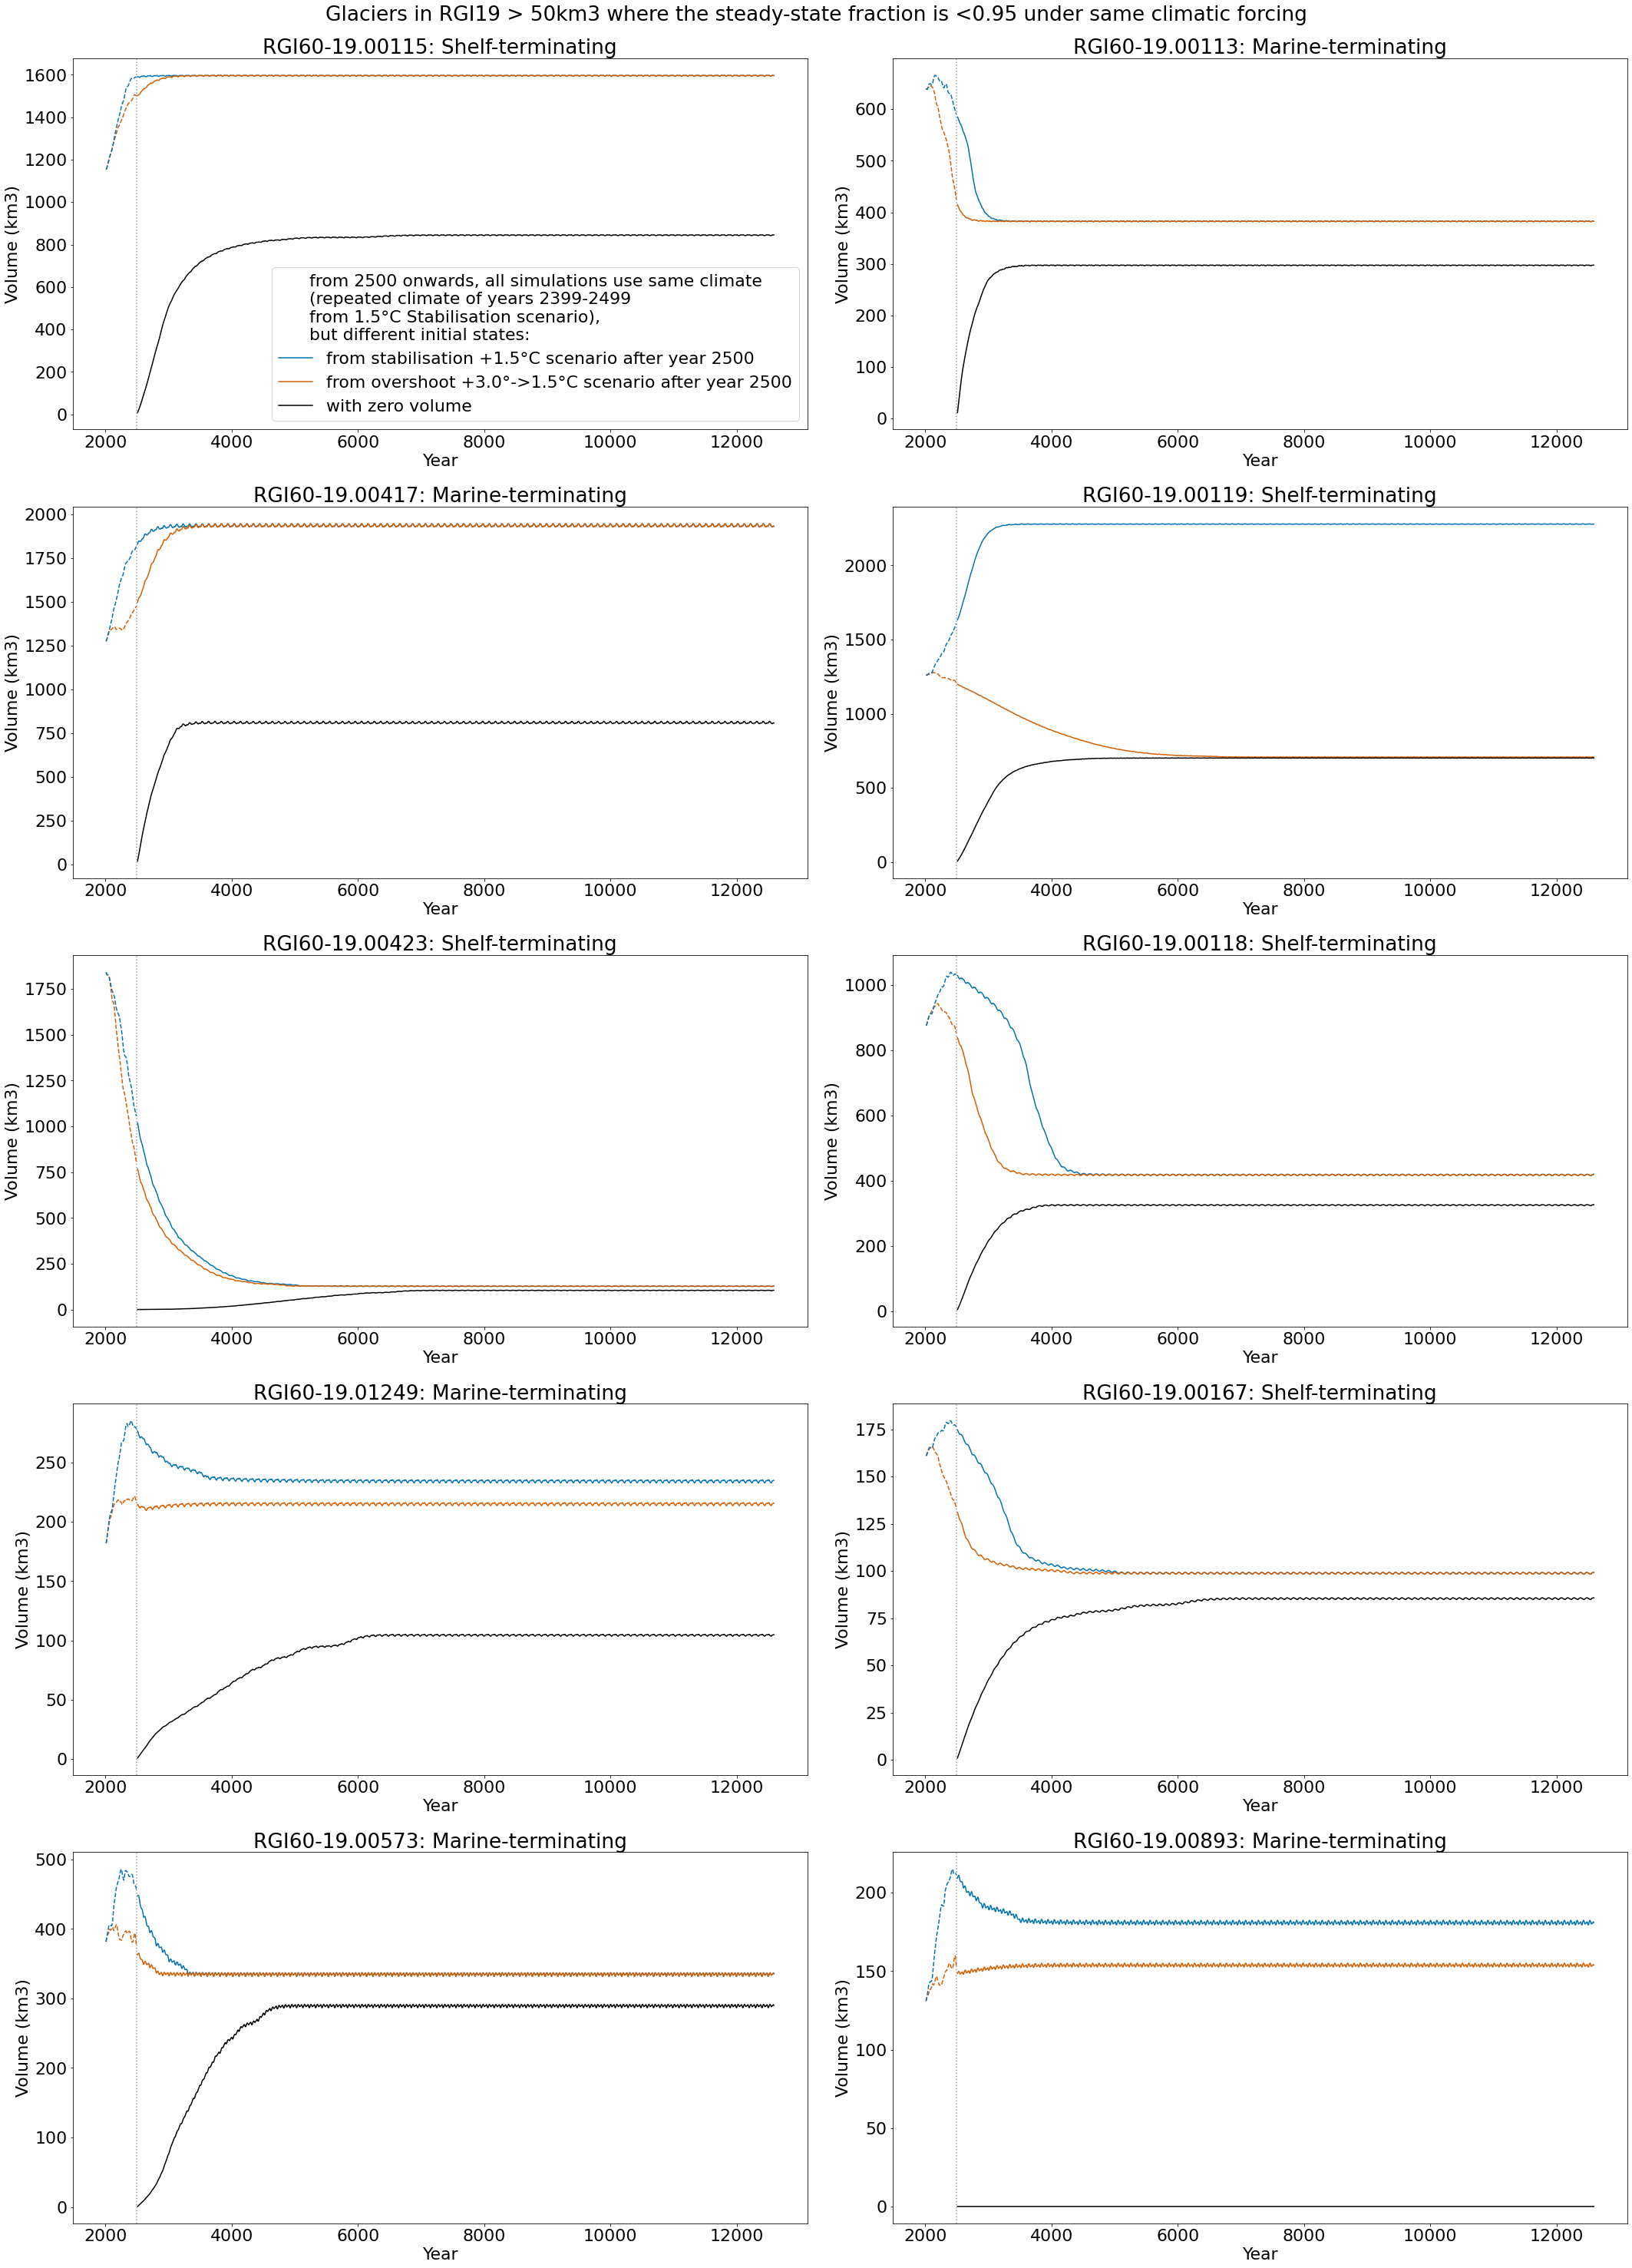

In [63]:
plt.rc('font', size=22)

fig,axs = plt.subplots(5,2,figsize=(30,42)) #, sharey=True)
axs =axs.flatten()
for j,rgi in enumerate(rgis_select):
    ax = axs[j]
    ax.plot(ds_oversh_500yr_roll.time, ds_oversh_500yr_roll.sel(rgi_id=rgi).volume.squeeze()/1e9, color=color_scenario['oversh_T30OS15'], ls='--')
    ax.plot(ds_T15_500yr_roll.time, ds_T15_500yr_roll.sel(rgi_id=rgi).volume.squeeze()/1e9, color=color_scenario['stab_T15'], ls='--')

    ax.plot(ds_T15_roll.time, ds_T15_roll.sel(rgi_id=rgi).volume.squeeze()/1e9, color=color_scenario['stab_T15'], 
             label='from stabilisation +1.5°C scenario after year 2500')
    ax.plot(ds_oversh_roll.time, ds_oversh_roll.sel(rgi_id=rgi).volume.squeeze()/1e9, 
             color=color_scenario['oversh_T30OS15'],
             label='from overshoot +3.0°->1.5°C scenario after year 2500'
            )
    ax.plot(ds_roll.time, ds_roll.sel(rgi_id=rgi).volume.squeeze()/1e9, color='black',
            label='with zero volume')

    han, lab = ax.get_legend_handles_labels()
    ax.axvline(2500, color='grey', alpha = 0.8,ls=':')
    if j == 0:
        ax.legend(loc='lower right',
                  title='from 2500 onwards, all simulations use same climate\n(repeated climate of years 2399-2499\nfrom 1.5°C Stabilisation scenario),\nbut different initial states:') 
                 # ,  loc='center right') #bbox_to_anchor=(1,0.9),
    ax.set_xlabel('Year')
    ax.set_ylabel('Volume (km3)');
    tip = rgi_meta.loc[rgi]['TerminusType']
    ax.set_title(f'{rgi}: {tip}')
    #ax.text(2900, 0, '--> , color='grey')

plt.suptitle('Glaciers in RGI19 > 50km3 where the steady-state fraction is <0.95 under same climatic forcing\n')
plt.tight_layout()

#plt.savefig('./figures/4_RGI19_crazy_tipping_point_glaciers.png')

In [64]:
fraction_f_oversh_sel = fraction_oversh_f.where((fraction_oversh_f<=0.95) & (ds_oversh_roll.volume.sel(time=10051-50)>1e8)).dropna(dim='rgi_id') # at least 1km3 big in the new steady-state
fraction_f_oversh_sel.rgi_id

<xarray.DataArray 'rgi_id' (rgi_id: 18)>
array(['RGI60-19.00057', 'RGI60-19.00119', 'RGI60-19.00183', 'RGI60-19.00528',
       'RGI60-19.00762', 'RGI60-19.00893', 'RGI60-19.00913', 'RGI60-19.01130',
       'RGI60-19.01249', 'RGI60-19.01521', 'RGI60-19.01734', 'RGI60-19.01753',
       'RGI60-19.01788', 'RGI60-19.02066', 'RGI60-19.02276', 'RGI60-19.02385',
       'RGI60-19.02477', 'RGI60-19.02510'], dtype=object)
Coordinates:
    time             float64 1.25e+04
  * rgi_id           (rgi_id) object 'RGI60-19.00057' ... 'RGI60-19.02510'
    hydro_year       int64 10001
    hydro_month      int64 10
    calendar_year    int64 10001
    calendar_month   int64 1
    bias_correction  <U12 'bc_1980_2019'
    OGGM_version     <U22 'OGGM_v161_gdirs_2023.3'
Attributes:
    description:  RGI glacier identifier